# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

In [2]:
num_documentos = len(newsgroupsdocs)
print(f"El dataset newsgroupsdocs tiene {num_documentos} documentos ")

El dataset newsgroupsdocs tiene 18846 documentos 


In [3]:
# Contenido documento 0 
print(newsgroupsdocs[0])



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer 
import pandas as pd

# Matriz de términos TF 
vectorizador_tf = CountVectorizer()

matriz_tf = vectorizador_tf.fit_transform(newsgroupsdocs)

# Vocabulario
vocabulario  = vectorizador_tf.get_feature_names_out()

# Convertimos la matriz a DataFrame
tf_df = pd.DataFrame(matriz_tf.toarray(), columns=vocabulario)


print("Matriz de términos (TF):")
print(tf_df)

Matriz de términos (TF):
       00  000  0000  00000  000000  00000000  0000000004  00000000b  \
0       0    0     0      0       0         0           0          0   
1       0    0     0      0       0         0           0          0   
2       0    0     0      0       0         0           0          0   
3       0    0     0      0       0         0           0          0   
4       0    0     0      0       0         0           0          0   
...    ..  ...   ...    ...     ...       ...         ...        ...   
18841   0    0     0      0       0         0           0          0   
18842   0    0     0      0       0         0           0          0   
18843   0    0     0      0       0         0           0          0   
18844   0    0     0      0       0         0           0          0   
18845   0    0     0      0       0         0           0          0   

       00000001  00000001b  ...  zzs  zzvsi  zzy_3w  zzz  zzzoh  zzzzzz  \
0             0          0  ...    

In [5]:
import numpy as  np

# Frecuencia de documentos  DF
frecuencia_documentos = np.sum(matriz_tf.toarray() > 0, axis=0)

# Series de Pandas para visualización
df_series = pd.Series(frecuencia_documentos, index=vocabulario)

print("Frecuencia de documentos ")
print(df_series.sort_values(ascending=False).head(20))


Frecuencia de documentos 
the     15749
to      14108
and     12991
of      12809
in      11842
is      11685
it      11029
that    10974
for     10406
have     8722
this     8665
on       8596
you      8447
be       8140
with     8063
not      7664
are      7404
but      7395
if       7383
or       7177
dtype: int64


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Construimos la matriz TF-IDF
vectorizador_tfidf = TfidfVectorizer()
matriz_tfidf = vectorizador_tfidf.fit_transform(newsgroupsdocs)

# Convertimos a DataFrame
vocabulario_tfidf = vectorizador_tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(matriz_tfidf.toarray(), columns=vocabulario_tfidf)

print("Matriz TF-IDF:")
print(tfidf_df)

Matriz TF-IDF:
        00  000  0000  00000  000000  00000000  0000000004  00000000b  \
0      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
1      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
2      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
3      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
4      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
...    ...  ...   ...    ...     ...       ...         ...        ...   
18841  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
18842  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
18843  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
18844  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
18845  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   

       00000001  00000001b  ...  zzs  zzvsi  zzy_3w  zzz  zzzoh  zzzzzz  \
0           0.0        0.0  ...  

## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [7]:
# Vector de Consulta  
consulta = 'going'
vector_consulta = vectorizador_tfidf.transform([consulta])
print("Vector de consulta TF-IDF:")
print(vector_consulta)

Vector de consulta TF-IDF:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 134410)>
  Coords	Values
  (0, 58077)	1.0


In [8]:
#Similitud coseno 
from sklearn.metrics.pairwise import cosine_similarity

similitud_coseno = cosine_similarity(vector_consulta, matriz_tfidf).flatten()
print(similitud_coseno)

[0.10945229 0.         0.04157032 ... 0.         0.         0.        ]


In [9]:
#Ranking de los documentos por relevancia  
indices_docs = np.argsort(similitud_coseno)[::-1]
print("Índices de los documentos ordenados por similitud:")
print(indices_docs)

Índices de los documentos ordenados por similitud:
[ 2211 10117  1905 ... 18818 18817 18834]


In [10]:
top_n = 20
indices_top = indices_docs[:top_n]

In [11]:
# Creacion del DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Índice del documento": indices_top,
    "Similitud coseno": similitud_coseno[indices_top],
    "num_aparece_consulta_en_doc": [matriz_tf[i].sum() for i in indices_top],
    "texto_documento": [newsgroupsdocs[i] for i in indices_top]
})

# Texto del documento más similar (el primero en el DataFrame)
texto_mas_similar = resultados_df.iloc[0]["texto_documento"]

# Mostrar los resultados
print("Texto del documento más similar:")
print(texto_mas_similar)
print("\nTop documentos relevantes para la consulta:")
print(resultados_df)

Texto del documento más similar:
Is anyone going to the P.B frenzy at Cadwell park in May.
I am going, but only to watch.



Top documentos relevantes para la consulta:
    Índice del documento  Similitud coseno  num_aparece_consulta_en_doc  \
0                   2211          0.378211                           17   
1                  10117          0.283517                           11   
2                   1905          0.279177                           64   
3                  18137          0.265750                           13   
4                  10536          0.260463                           12   
5                   1889          0.240041                           90   
6                  10382          0.239019                          178   
7                   4969          0.237529                           14   
8                   2051          0.235356                           43   
9                   6073          0.234658                           84   
10    

## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [12]:
from rank_bm25 import BM25Okapi
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Tokenizador 
def tokenizar(texto):
    # Quitamos los caracteres no alfabéticos y convertimos a minúsculas
    tokens = re.findall(r'\b\w+\b', texto.lower())
    # Quitamos stopwords
    tokens = [t for t in tokens if t not in ENGLISH_STOP_WORDS]
    return tokens

# Tokenizamos todos los documentos
documentos_tokenizados = [tokenizar(doc) for doc in newsgroupsdocs]

In [13]:
bm25 = BM25Okapi(documentos_tokenizados)
consulta = ["going"]
consulta_tokenizada = [tokenizar(q) for q in consulta][0]

# Scores BM25 para cada documentos
scores_bm25 = bm25.get_scores(consulta_tokenizada)

In [14]:
# Ranking BM25 
indices_bm25 = scores_bm25.argsort()[::-1]

# Ranking TF-IDF
indices_tfidf = indices_docs

# Resultados para comparación
print("Top 10 documentos según BM25:")
for i in indices_bm25[:10]:
    print(f"Doc {i} - Score BM25: {scores_bm25[i]:.4f}")

print("\nTop 10 documentos según TF-IDF:")
for i in indices_tfidf[:10]:
    print(f"Doc {i} - Similaridad TF-IDF: {similitud_coseno[i]:.4f}")


Top 10 documentos según BM25:
Doc 7751 - Score BM25: 5.1507
Doc 1905 - Score BM25: 5.0590
Doc 2211 - Score BM25: 5.0580
Doc 64 - Score BM25: 5.0196
Doc 10382 - Score BM25: 4.9565
Doc 1889 - Score BM25: 4.9274
Doc 6073 - Score BM25: 4.8892
Doc 11101 - Score BM25: 4.8517
Doc 412 - Score BM25: 4.8393
Doc 7698 - Score BM25: 4.7894

Top 10 documentos según TF-IDF:
Doc 2211 - Similaridad TF-IDF: 0.3782
Doc 10117 - Similaridad TF-IDF: 0.2835
Doc 1905 - Similaridad TF-IDF: 0.2792
Doc 18137 - Similaridad TF-IDF: 0.2658
Doc 10536 - Similaridad TF-IDF: 0.2605
Doc 1889 - Similaridad TF-IDF: 0.2400
Doc 10382 - Similaridad TF-IDF: 0.2390
Doc 4969 - Similaridad TF-IDF: 0.2375
Doc 2051 - Similaridad TF-IDF: 0.2354
Doc 6073 - Similaridad TF-IDF: 0.2347


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Número de documentos más relevantes a mostrar
top_n = 20

#Índices de los documentos 
top_indices_tfidf = indices_docs[:top_n]
top_indices_bm25 = indices_bm25[:top_n]

#Indices para comparar
indices_union = list(set(top_indices_tfidf) | set(top_indices_bm25))

# DataFrame  resultados 
comparacion_df = pd.DataFrame({
    "Documento": indices_union,
    "Score_TFIDF": [similitud_coseno[i] for i in indices_union],
    "Score_BM25": [scores_bm25[i] for i in indices_union]
})

# Ordenar por score TF-IDF
comparacion_df = comparacion_df.sort_values(by="Score_TFIDF", ascending=False).reset_index(drop=True)

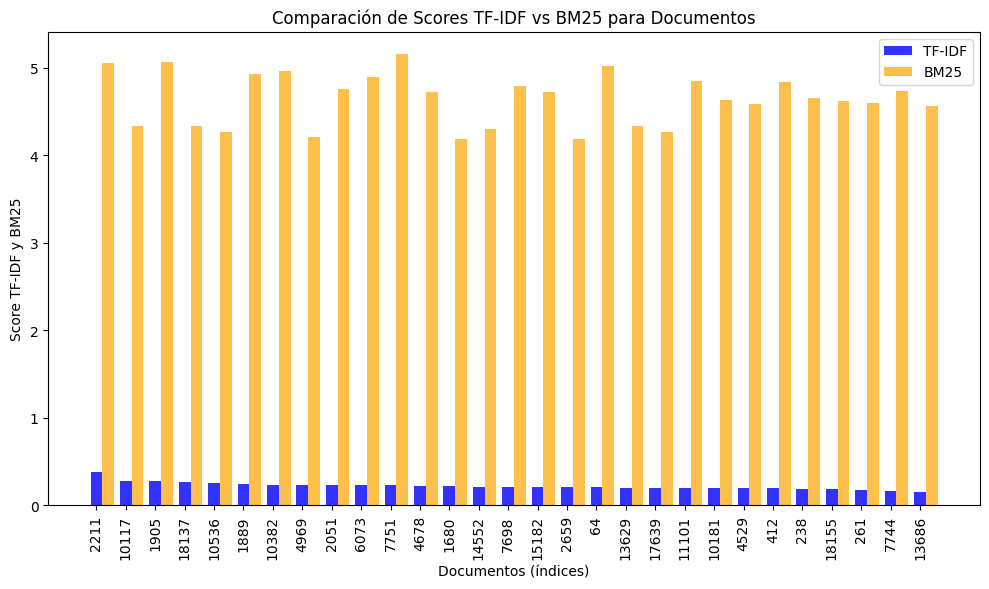

In [16]:
# Gráfico de barras TF-IDF vs BM25
plt.figure(figsize=(10, 6))

indices = range(len(comparacion_df))
bar_width = 0.4


plt.bar(indices, comparacion_df["Score_TFIDF"], width=bar_width, color='blue', alpha=0.8, label="TF-IDF")
plt.bar([i + bar_width for i in indices], comparacion_df["Score_BM25"], width=bar_width, color='orange', alpha=0.7, label="BM25")

plt.xlabel("Documentos (índices)")
plt.ylabel("Score TF-IDF y BM25")
plt.title("Comparación de Scores TF-IDF vs BM25 para Documentos")
plt.xticks(indices, comparacion_df["Documento"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


**¿Qué documentos obtienen scores más altos en un modelo que en otro?**   
En el grafico de barras se observa que tienen mucha diferencia entre TF-IDF y BM25. Siendo que el score es mas alto en BM25 y mucho mas notorio la diferencia de score entre documentos.  

**¿A qué se podría deber esta diferencia?**  
TF-IDF le da más importancia a las palabras que aparecen varias veces en un documento pero que no son tan comunes en el resto de documentos.

BM25 toma en cuenta qué tan largo es un documento y evita darle demasiada importancia a que una palabra se repita muchas veces

## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [17]:
consulta = ["going"]
relevantes = {2211 , 10117 , 1905}

In [18]:
def precision_at_k(ranking, relevantes, k):
    top_k = ranking[:k]
    relevantes_en_top_k = [doc for doc in top_k if doc in relevantes]
    return len(relevantes_en_top_k) / k

def average_precision(ranking, relevantes):
    ap = 0.0
    relevantes_encontrados = 0
    for i, doc in enumerate(ranking, start=1):
        if doc in relevantes:
            relevantes_encontrados += 1
            ap += relevantes_encontrados / i
    if relevantes_encontrados == 0:
        return 0.0
    return ap / relevantes_encontrados

def mean_average_precision(rankings, relevantes):
    return average_precision(rankings, relevantes)


In [19]:
k = 3

# Rankings 
ranking_tfidf = indices_docs
ranking_bm25 = indices_bm25


prec_tfidf = precision_at_k(ranking_tfidf, relevantes, k)
prec_bm25 = precision_at_k(ranking_bm25, relevantes, k)


map_tfidf = average_precision(ranking_tfidf, relevantes)
map_bm25 = average_precision(ranking_bm25, relevantes)


print(f"Precision@{k} TF-IDF: {prec_tfidf:.3f}")
print(f"MAP TF-IDF: {map_tfidf:.3f}")
print(f"Precision@{k} BM25: {prec_bm25:.3f}")
print(f"MAP BM25: {map_bm25:.3f}")


Precision@3 TF-IDF: 1.000
MAP TF-IDF: 1.000
Precision@3 BM25: 0.667
MAP BM25: 0.415


**¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?** 

Para este caso donde elegi unos pocos docs considerados relevantes el resultado me indico que TF-IDF fue más eficaz para esta consulta y conjunto de documentos.